In [4]:
import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch import nn
from torch.utils.data import DataLoader

In [5]:
data = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

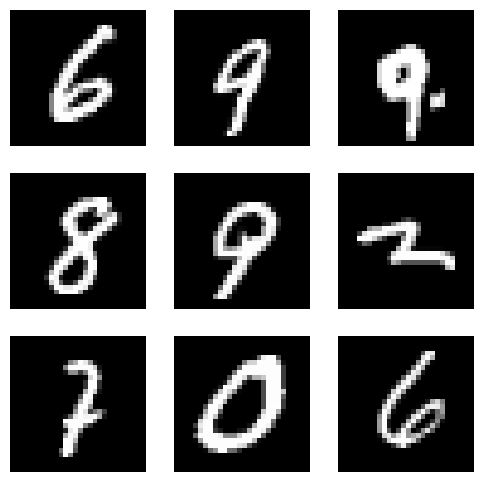

In [7]:
figure = plt.figure(figsize=(6,6))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_index = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_index]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
class Autoencoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        code = self.encoder(x)
        output = self.decoder(code)
        return output

In [10]:
learning_rate = 1e-4
batch_size = 32

AE = Autoencoder()

In [11]:
loss_fn = nn.MSELoss()

In [12]:
#optimizer = torch.optim.SGD(ae.parameters(), lr=learning_rate, momentum=momentum)
optimizer = torch.optim.Adam(AE.parameters(),
                             lr = learning_rate,
                             weight_decay = 1e-8)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True)

Epoch  0
[ 2 17  5 28]


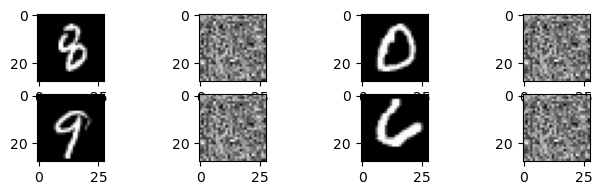

0.23097248375415802
Epoch  1
[ 3 21  1 14]


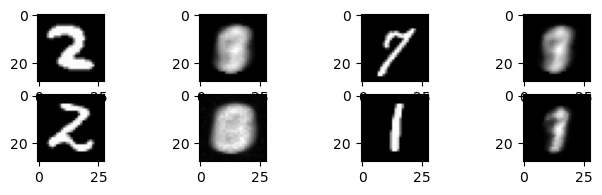

0.0661865621805191
Epoch  2
[22  0  8 15]


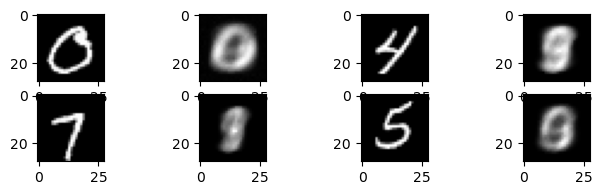

0.05548655241727829
Epoch  3
[17 25  3  1]


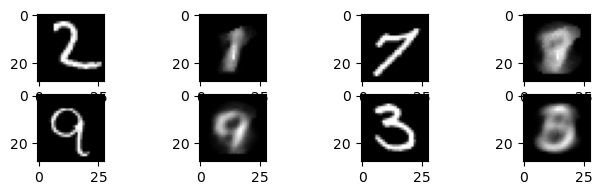

0.05802647024393082
Epoch  4
[18 21 12 28]


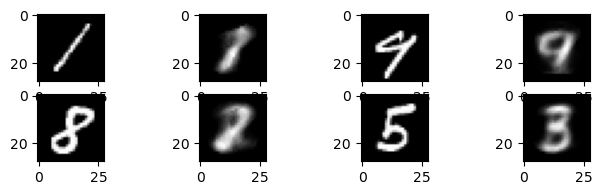

0.05532773211598396
Epoch  5
[23  3 29 24]


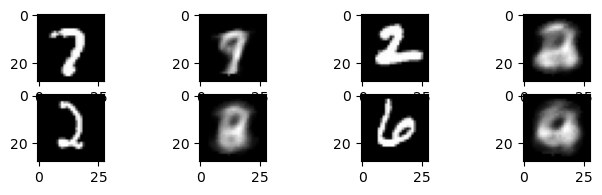

0.04839622601866722
Epoch  6
[16 28  1  3]


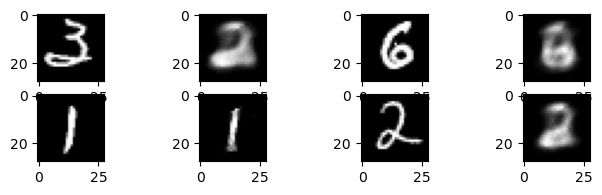

0.04075925797224045
Epoch  7
[19  2  3 15]


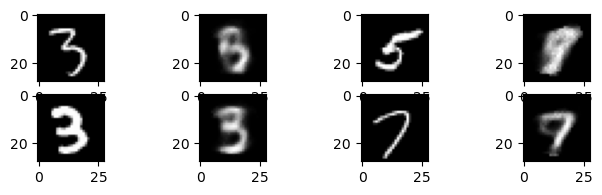

0.04057031869888306
Epoch  8
[21 14  4  0]


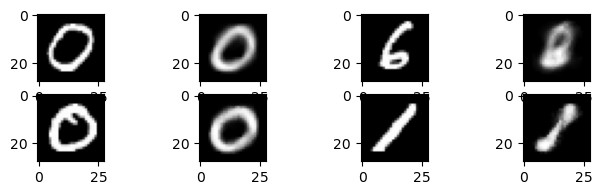

0.040589358657598495
Epoch  9
[ 9 18  9 13]


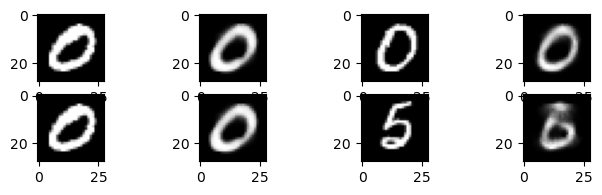

0.03887927159667015
Epoch  10
[ 9 29 19  2]


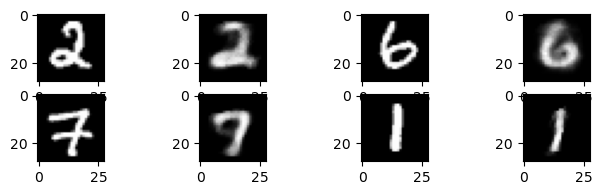

0.03957471624016762
Epoch  11
[27  3 30 24]


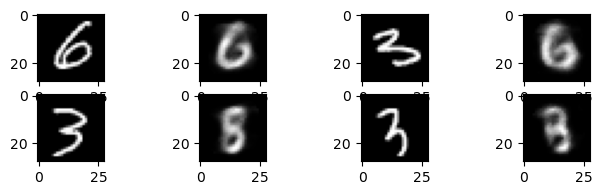

0.04160665348172188
Epoch  12
[14 26 29 14]


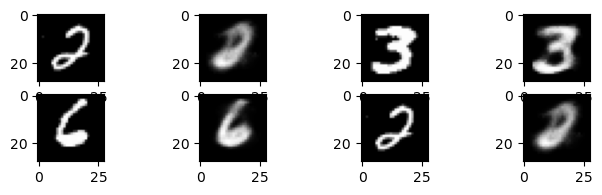

0.03810523822903633
Epoch  13
[11 10 16 22]


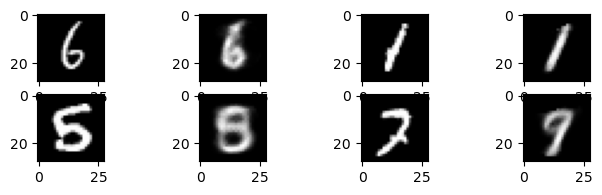

0.03603297472000122
Epoch  14
[12 24 11 26]


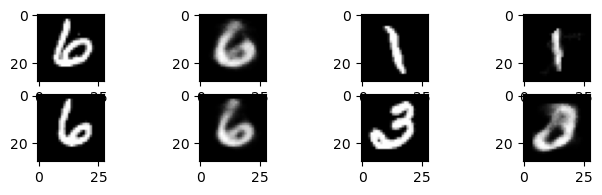

0.038341280072927475
Epoch  15
[ 4 23 19 16]


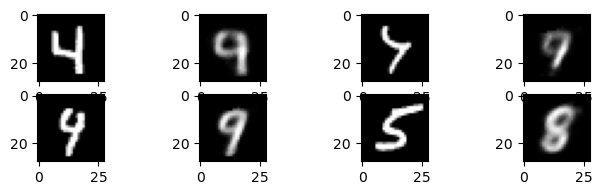

0.03456521034240723
Epoch  16
[ 0 28 22 15]


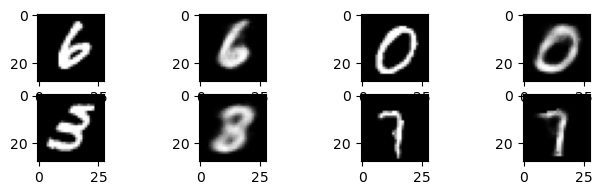

0.031974662095308304
Epoch  17
[ 0 29 14 19]


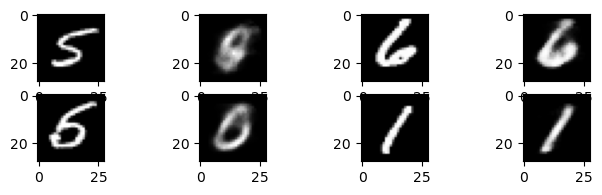

0.033138684928417206
Epoch  18
[6 6 6 2]


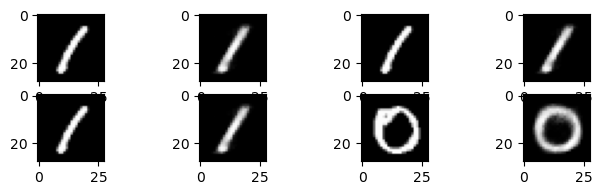

0.03352333977818489
Epoch  19
[26  7 31 23]


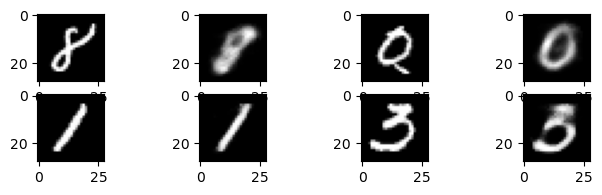

0.03344818577170372
Epoch  20
[26  2  6 29]


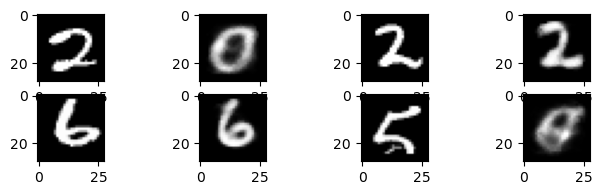

0.030846642330288887
Epoch  21
[19 13 19 13]


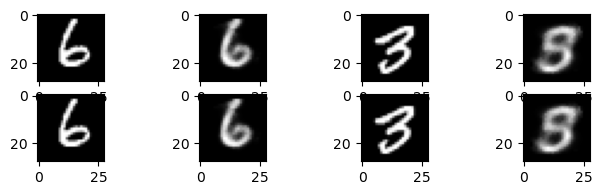

0.03193606063723564
Epoch  22
[ 1 21  4 25]


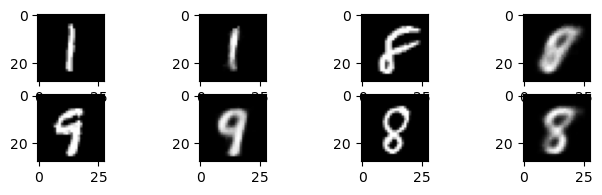

0.03004050813615322
Epoch  23
[12 27  6  8]


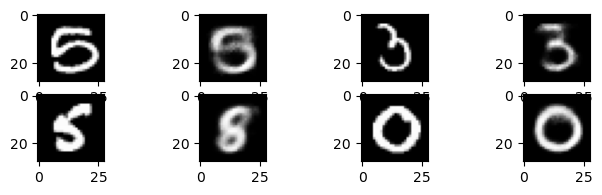

0.033148933202028275
Epoch  24
[18 24 16 11]


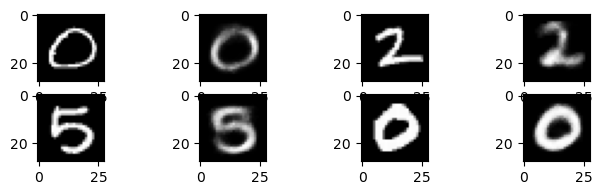

0.02877104841172695
Epoch  25
[2 0 8 2]


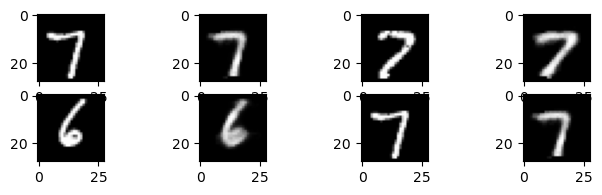

0.029245756566524506
Epoch  26
[ 1  0 24  4]


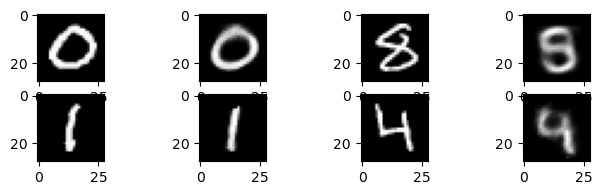

0.030634867027401924
Epoch  27
[12  9 19  7]


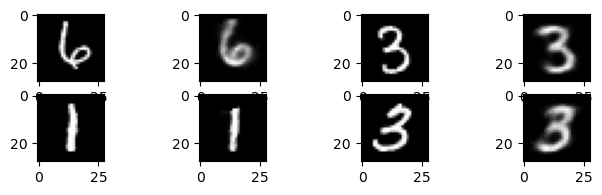

0.028815167024731636
Epoch  28
[ 1 30 16  8]


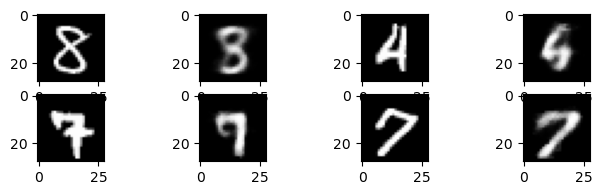

0.03057745099067688
Epoch  29
[22  4  5  0]


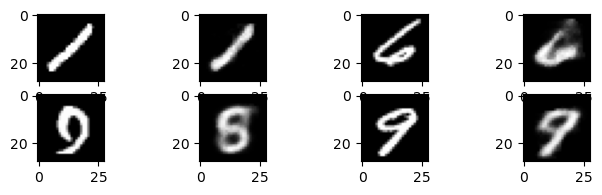

0.03023630753159523


In [13]:
# Training loop
epochs = 30
losses = []
for epoch in range(epochs):
    plot = True

    AE.train()
    for (image, _) in data_loader:

        # Reshape image for input
        image = image.reshape(-1, 784)

        # Feed through the network
        reconstruction = AE(image)

        # Calculate loss function
        loss = loss_fn(reconstruction, image)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if plot==True:
            fig = plt.figure(figsize=(8,4))
            print('Epoch ', epoch)
            with torch.no_grad():
                recon_plot = reconstruction.reshape(-1, 28, 28)
                images_plot = image.reshape(-1, 28, 28)
                indices = numpy.random.choice(32, 4)
                print(indices)
                for i, ind in enumerate(indices):
                    ax1 = fig.add_subplot(4,4,2*i+1)
                    ax1.imshow(images_plot[ind], cmap='gray')
                    ax2 = fig.add_subplot(4,4,2*i+2)
                    ax2.imshow(recon_plot[ind], cmap='gray')
            
            plt.show()
            print(losses[-1])
            plot=False

        

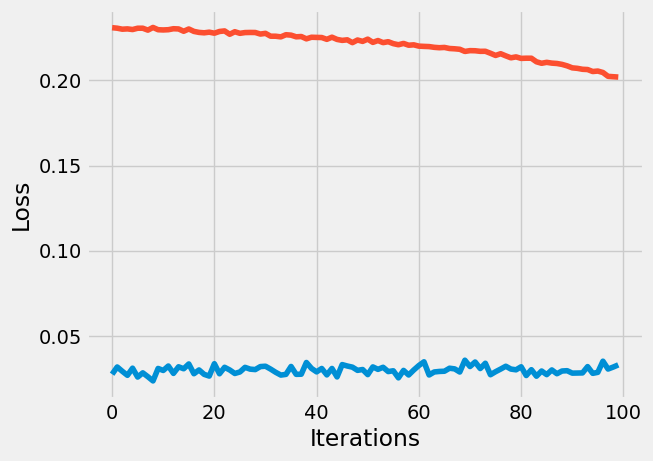

In [14]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])
plt.plot(losses[:100])

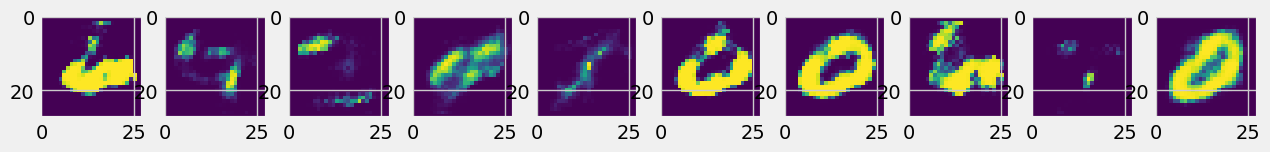

In [75]:
# Decoding randomly generated latent space points

sample_index = numpy.random.randint(len(data))
img, label = data[sample_index]
fig = plt.figure(figsize=(14,10))
with torch.no_grad():
    for i in range(10):
        z = AE.encoder(img.reshape(-1, 784))
        z_rand = torch.from_numpy(numpy.random.uniform(-50, 50, 9)).unsqueeze(0).to(torch.float32)
        x_rand = AE.decoder(z_rand)
        ax = fig.add_subplot(1,10,i+1)
        ax.imshow(x_rand.squeeze().reshape(28,28))
plt.show()